<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


##### The following describes the dataset variables:
* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000 USD
* PTRATIO - pupil-teacher ratio by town
* LSTAT - percentage lower status of the population
* MEDV - Median value of owner-occupied homes in 1000's USD

### Task 1: Become familiar with the dataset

In [5]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [6]:
boston_df.head(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


In [7]:
boston_df.tail(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
496,496,0.28960,0.0,9.69,0.0,0.585,5.390,72.9,2.7986,6.0,391.0,19.2,21.14,19.7
497,497,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6.0,391.0,19.2,14.10,18.3
498,498,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,12.92,21.2
499,499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6.0,391.0,19.2,15.10,17.5
500,500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,14.33,16.8
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0
505,505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,7.88,11.9


### Task 2: Generate Descriptive Statistics and Visualizations

#### For the "Median value of owner-occupied homes" provide a boxplot

Text(0.5, 1.0, 'owner-occupied homes')

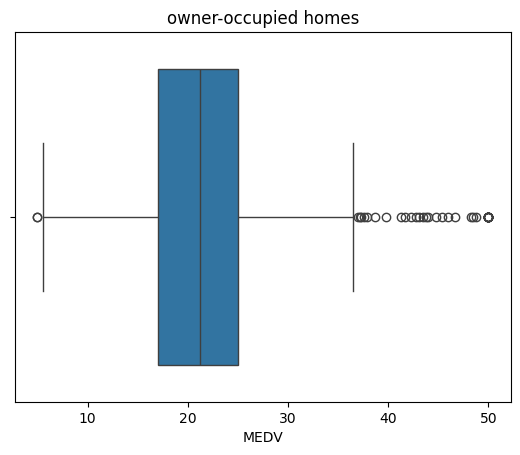

In [8]:
q1 = sns.boxplot(x = 'MEDV', data = boston_df)
q1.set_title('owner-occupied homes')

##### explanation: boxplot shows median value for variable MEDV among outliers after third quartile

#### Provide a  bar plot for the Charles river variable

Text(0.5, 1.0, 'number of homes near charles river')

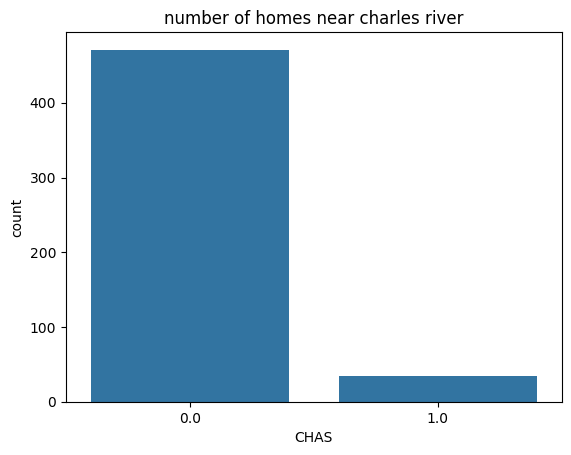

In [9]:
q2 = sns.countplot(x = 'CHAS', data = boston_df)
q2.set_title('number of homes near charles river')

##### explanation: histogram shows majority of houses not near charles river

#### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [10]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE']<70),'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

Text(0.5, 1.0, 'MEDV variable vs AGE variable')

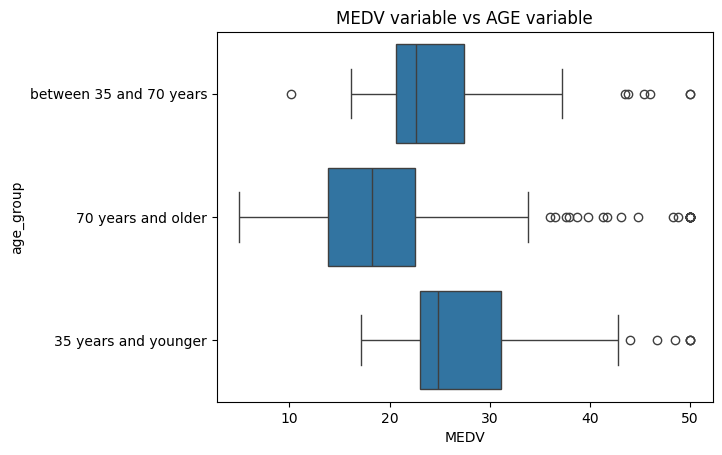

In [11]:
q3 = sns.boxplot(x = 'MEDV', y = 'age_group', data = boston_df)
q3.set_title('MEDV variable vs AGE variable')

##### explanation: boxplot shows on average median value of owner occupied homes is higher when age is lower

#### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0.5, 1.0, 'nitric oxide concentrations vs proportion of non-retail business acres per town')

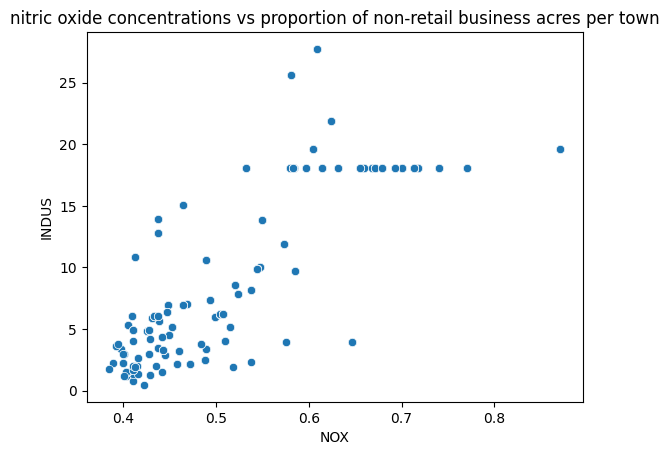

In [12]:
q4 = sns.scatterplot(x = 'NOX', y = 'INDUS', data = boston_df)
q4.set_title('nitric oxide concentrations vs proportion of non-retail business acres per town')

##### explanation: the data shows an uphill trend as you move from left to right, indicating a positive relationship between NOX and INDUS in which the values of NOX increase, the values of INDUS also tend to increase until NOX = 0.6

#### Create a histogram for the pupil to teacher ratio variable

Text(0.5, 1.0, 'pupil to teacher ratio')

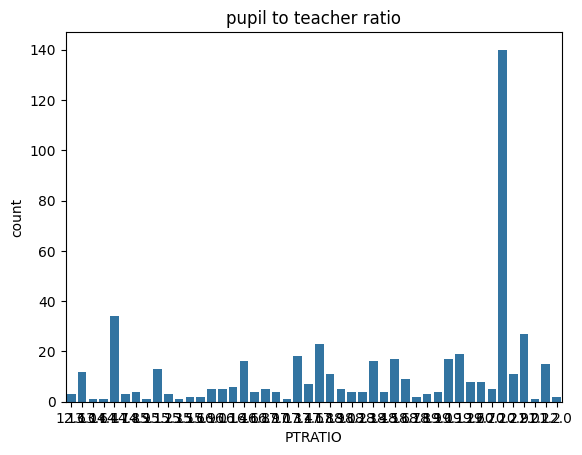

In [13]:
q5 = sns.countplot(x = 'PTRATIO', data = boston_df)
q5.set_title('pupil to teacher ratio')

##### explanation: histogram shows pupil to teacher ratio is highest at 140

### Task 3: Use the appropriate tests to answer the questions provided.

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
###### Note: state your hypothesis, use α = 0.05, perform the test statistics, and state the conclusion from the test

##### null hypothesis: there is no significant difference in median value between houses bounded by the charles river and not bounded by the charles river
##### alternative hypothesis: there is significant difference in median value between houses bounded by the charles river and not bounded by the charles river

In [14]:
boston_df.loc[(boston_df['CHAS'] == 0), 'CHAS_T'] = 'FAR'
boston_df.loc[(boston_df['CHAS'] == 1), 'CHAS_T'] = 'NEAR'
boston_df.head(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group,CHAS_T
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years,FAR
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older,FAR
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years,FAR
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years,FAR
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years,FAR
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7,between 35 and 70 years,FAR
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9,between 35 and 70 years,FAR
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1,70 years and older,FAR
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5,70 years and older,FAR
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9,70 years and older,FAR


In [15]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS_T'] == 'FAR']['MEDV'], 
                      boston_df[boston_df['CHAS_T'] == 'NEAR']['MEDV'], equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

##### conclusion: since the p-value is more than the alpha value of 0.05, we reject the null hypothesis and conclude that there is no statistical difference in median value between houses near the charles river and houses further away

#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
###### Note: state your hypothesis, use α = 0.05, perform the test statistics, and state the conclusion from the test

##### null hypothesis: there is no statistical difference in median values of houses for each proportion of owner occupied units built prior to 1940
##### alternative hypothesis: there is statistical difference in median values of houses for each proportion of owner occupied units built prior to 1940

In [16]:
younger = boston_df[boston_df["age_group"] == '35 years and younger']["MEDV"]
middle = boston_df[boston_df["age_group"] == 'between 35 and 70 years']["MEDV"]
older = boston_df[boston_df["age_group"] == '70 years and older']["MEDV"]
f_stats, p_value = scipy.stats.f_oneway(younger,middle,older,axis=0)
print("f-stats={0}, p-value={1}".format(f_stats,p_value))

f-stats=36.40764999196599, p-value=1.7105011022702984e-15


##### conclusion: since the p-value is less than alpha value of 0.05, we fail to reject the null hypothesis and conclude that there is statistical difference in median value for each proportion of owner occupied units built prior to 1940

#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
###### Note: state your hypothesis, use α = 0.05, perform the test statistics, and state the conclusion from the test

##### null hypothesis: there is no relationship between nitric oxide concentration and the proportion of non-retail business acres per town
##### alternative hypothesis: there is a relationship between nitric oxide concentration and the proportion of non-retail business acres per town

In [17]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

##### conclusion: since the pearson coefficient is 0.76365 and the p-value is less than 0.05, we reject the null hypothesis due to the positive relationship between nitric oxide concentration and proportion of non-retail business acres per town (which was also confirmed with the scatter plot in a previous question that was answered earlier)

#### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
###### Note: state your hypothesis, use α = 0.05, perform the test statistics, and state the conclusion from the test

##### null hypothesis: there is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
##### alternative hypothesis: there is impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes

In [18]:
x = boston_df['DIS']
y = boston_df['MEDV']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predic = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           1.21e-08
Time:                        22:49:38   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### conclusion: since the coef DIS is 1.0916, we reject the null hypothesis and conclude there is an indication that an additional weighted distance to the five empolyment centers in boston increases of 1.0916 the median value of owner occupied homes